In [3]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

Download https://drive.google.com/drive/folders/1BZFez3OFs7QMzeDUz-8E0SgnRy227pnG

Unzip

In [2]:
!gdown --id 11ClGyOtQZNyaVanzwoEFvADvY5BQ5HNN

!mkdir data
!tar -xf ./inno_stats.tar.gz -C ./data

Downloading...
From: https://drive.google.com/uc?id=11ClGyOtQZNyaVanzwoEFvADvY5BQ5HNN
To: /content/inno_stats.tar.gz
1.91GB [00:12, 150MB/s]


!mkdir data
!tar -xf inno_stats.tar.gz -C ./data

In [4]:
data_path = Path('./data/').resolve()
!ls {data_path}

09_groups.csv  10_groups.csv  11_groups.csv  product_groups.csv


In [5]:
g_9 = pd.read_csv('./data/09_groups.csv')
g_9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [5]:
#g_10 = pd.read_csv('./data/10_groups.csv')
#g_10.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-10-01 20:22:55,2035558,0.0,1636749,52,339,1.0,107.90,0,10004
1,2020-10-01 20:54:12,13037327,0.0,267261,52,339,1.0,80.04,0,10004
2,2020-10-01 21:25:59,1430590,0.0,1331395,61,379,1.0,31.92,1,10091
3,2020-10-01 13:31:01,3504660,0.0,641525,61,97,1.0,55.98,0,10091
4,2020-10-01 16:32:06,11024438,0.0,1325852,61,97,4.0,176.00,0,10091


In [6]:
#g_11 = pd.read_csv('./data/11_groups.csv')
#g_11.head()

In [3]:
p_g = pd.read_csv('./data/product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


In [6]:
#!gdown --id 1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM
bids = pd.read_excel('bad_ids.xlsx', index_col=0)

print(bids.head())

bids = bids['id_card']

   id_card
0   806096
1  1438102
2    72344
3   427981
4  1528414


In [7]:
g_9_clear = g_9[~(g_9['id_card'].isin(bids))]

g_9_clear.head() #work on this

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

In [7]:
from scipy.stats import chisquare

asum = g_9_clear.groupby('id_doc')['sum'].mean().values
adisc = g_9_clear.groupby('id_doc')['is_green'].count().values

chisquare(adisc, asum)
#pvalue - 0 => hypotesis correct

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

## Task 2
Prove that the frequency of shopping grows around the wage taking days.

In [14]:
import matplotlib.pyplot as plt

g_9_clear.date = pd.to_datetime(g_9_clear.date, format="%d")

items_day = g_9_clear.groupby(g_9_clear.date.dt.day)['id_doc'].count()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


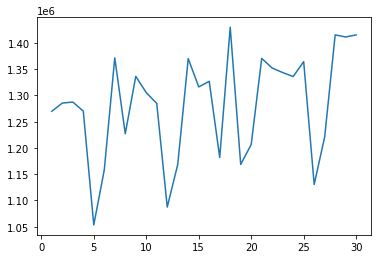

In [15]:
plt.plot(items_day)

#at days 5,12,17,19,26 miminum amount of recepies
#and at days 20-25 amount of recepices constant, 
#that mean that shopping grows around wage days   

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

##Frequent buyers 





(array([6.171742e+06, 6.463800e+05, 7.310700e+04, 1.077500e+04,
        2.236000e+03, 4.470000e+02, 9.300000e+01, 3.500000e+01,
        6.000000e+00, 4.000000e+00]),
 array([  1. ,  11.7,  22.4,  33.1,  43.8,  54.5,  65.2,  75.9,  86.6,
         97.3, 108. ]),
 <a list of 10 Patch objects>)

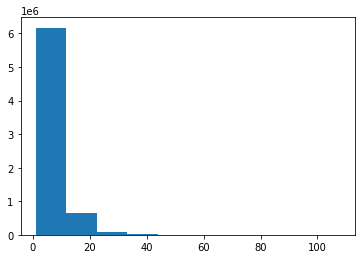

In [8]:
import matplotlib.pyplot as plt

f_buyers = g_9_clear.groupby('id_doc')['id_doc'].count()

plt.hist(f_buyers)

##Average purchase sum 

(array([9.90614e+05, 1.92347e+05, 7.59600e+04, 3.52700e+04, 1.82370e+04,
        9.67500e+03, 5.24900e+03, 2.96400e+03, 1.58500e+03, 8.85000e+02]),
 array([    0.   ,  3999.855,  7999.71 , 11999.565, 15999.42 , 19999.275,
        23999.13 , 27998.985, 31998.84 , 35998.695, 39998.55 ]),
 <a list of 10 Patch objects>)

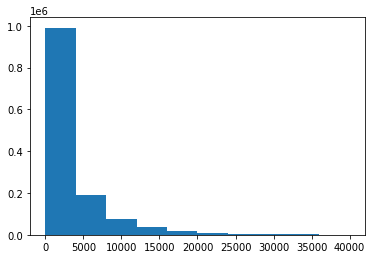

In [9]:
avg_sum = g_9_clear.groupby('id_card')['sum'].sum()

plt.hist(avg_sum[avg_sum<40000])

##Usual cart 

(array([103.,  22.,  17.,  11.,   3.,   1.,   3.,   2.,   1.,   1.]),
 array([1.000000e+00, 7.654180e+04, 1.530826e+05, 2.296234e+05,
        3.061642e+05, 3.827050e+05, 4.592458e+05, 5.357866e+05,
        6.123274e+05, 6.888682e+05, 7.654090e+05]),
 <a list of 10 Patch objects>)

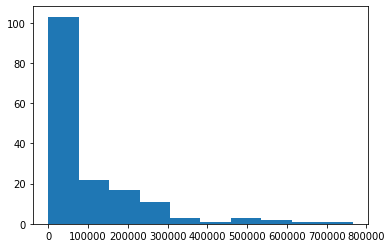

In [12]:
us_cart = g_9_clear.groupby('id_group')['id_card'].unique().apply(len)

plt.hist(us_cart)